In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img = cv2.imread('lena.bmp',0)
rows,cols = img.shape
bmp_image = np.asarray(img)

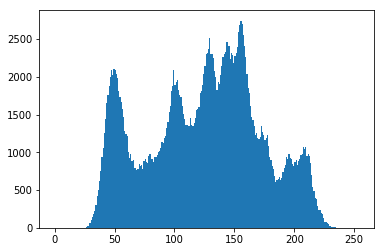

In [3]:
cnt = []
for i in range(rows):
    for j in range(cols):
        pix = bmp_image[i][j]
        cnt.append(pix)
plt.hist(cnt,range(0,255))
plt.savefig("plt.jpg")

## 2

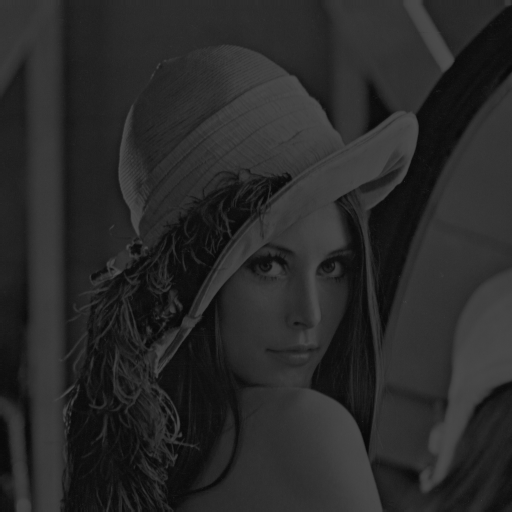

In [8]:
new_image = np.empty([rows,cols])
for i in range(rows):
    for j in range(cols):
        new_image[i][j] = bmp_image[i][j]//3

cv2.imwrite("1.bmp",new_image)
Image.fromarray(new_image.astype('uint8'),'L')

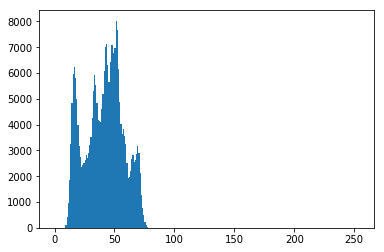

In [5]:
cnt = []
for i in range(rows):
    for j in range(cols):
        pix = new_image[i][j]
        cnt.append(pix)
plt.hist(cnt,range(0,255))
plt.savefig("plt2.jpg")

## 3 equalization

In [6]:
num = [0]*256
n_sum = rows*cols
for i in range(rows):
    for j in range(cols):
        num[int(new_image[i][j])] += 1
s = [0]*256

for i in range(256):
    for j in range(i):
        s[i] += num[j]/n_sum
    s[i] *= 255

equal_image = np.empty([rows,cols])
for i in range(rows):
    for j in range(cols):
        equal_image[i][j] = s[int(new_image[i][j])]
        
Image.fromarray(equal_image.astype('uint8'),'L')
cv2.imwrite("2.bmp",equal_image)

True

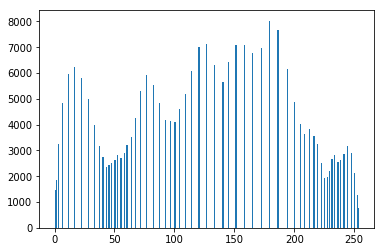

In [7]:
cnt = []
for i in range(rows):
    for j in range(cols):
        pix = equal_image[i][j]
        cnt.append(pix)
plt.hist(cnt,range(0,255))
plt.savefig("plt3.jpg")